# <font color='magenta'>Welcome</font> to the <font color='green'>BoloCalc</font><font color='blue'>+</font> simulation workbook for the <font color='orange'>CMB-S4 Collaboration</font>!

### Author: Alec Hryciuk 
### University of Chicago Graduate Student
### Contact: <u><font color='blue'>hryciuk@uchicago.edu</font></u>

### Press <strong><font color='green'>Shift-Enter</font></strong> to <b>evaluate</b> all the cells in a decending order or hit run all to generate the interface. <font color='orange'>Note:</font> This interface and it's modules need to be in the same directory as Bolocalc. If it is not then you may run into FileNotFound Errors when trying to run calcBolos simulations because the interface is searching in the wrong directory.


# <font color='green'>Import</font> necessary <font color='blue'>packages</font>:

---

## You must run the cell below to generate any of the interfaces later on!

### Here we just need to <font color='green'>import</font> the necessary <font color='blue'>python packages</font> for displaying the interface. You may need to change the directory in "sys.path.append()" to where you have dumped the project. 

### If you want the notebook to look nicer (no giant blocks of code), it was coded with a CodeFolder extension to the IPython Notebook. You should be able to enable it by going to the Nbextensions tab in the home directory of Jupyter and checking the box.

In [1]:
import ipywidgets as ipw
from ipywidgets import interact, interact_manual, Layout, Button, Box, HBox, VBox
import IPython.display as display
import sys, os
#sys.path.append('/home/ahryciuk/BoloCalc')
from BoloCalcConverters import TeleCamNames, AppendFiles, runCalcBolos
from N_ell_calculator import S4_noise
import numpy as np
#from ilc_modules import flatsky, misc, ilc
#from ilc_modules import foregrounds as fg
import pandas as pd
import json

global cwd
cwd = os.getcwd()

#Add where the project path is on your system
#sys.path.append('Enter path here')

# <font color='green'>Save</font> Path to <font color='blue'>Experimental Directory</font>:

---

### Enter the path to the <font color='blue'>experimental directory</font> you want to simulate. <font color='green'>Click</font> 'Run Interact' to save the path for the coming code.

In [2]:
#Save Experimental Path (run the above cell to import necessary packages)
def save_path(path):
    global exp_dir
    exp_dir = path
    try:
        print('Path saved as ' + exp_dir)
        global telescope_names, camera_names
        telescope_names, camera_names = TeleCamNames.TeleCamNames(exp_dir)
        print('Your telescope names are:')
        print(telescope_names)
        print('with camera names:')
        print(camera_names)
    except:
        print('Are you sure you input a valid path?')
    return
interact_manual(save_path,path='')

<function __main__.save_path>

# <font color='green'>Run</font> a <font color='blue'>BoloCalc Simulation</font>:

---

### Here is where you will <font color='green'>run</font> a <font color='blue'>BoloCalc simulation</font> of the experiment you just entered.

### For details on how calcBolos runs simulations  <a href="https://github.com/chill90/BoloCalc/blob/master/MANUAL/BoloCalc_User_Manual.pdf"> click here</a>

In [3]:
#Run to Generate Simulation Interface

#Import simulation from Bolocalc to get value of status bar?
    
#Instantiate command classes
run_sim = runCalcBolos.runCalcBolos()
ap = AppendFiles.AppendFiles()

################################################################################# 
    
#Button Click Definitions:
def appfiles(a):
    try:
        ap.InputConvert(exp_dir)
    except NameError:
        print('Please Enter an Experimental Path')
    return
def appinput(a):
    try:
        ap.AppendInputs(exp_dir)
    except NameError:
        print('Please Enter an Experimental Path')
    return
def convout(a):
    try:
        ap.ConvertOutputFiles(exp_dir)
    except NameError:
        print('Please Enter an Experimental Path')
    return
def savefiles_in(a):
    try:
        a=0
        ap.SaveFiles(exp_dir, save_in_to.value, save_in_name.value, a)
    except NameError:
        print('Please Enter an Experimental Path')
    return
def savefiles_out(a):
    try:
        a=1
        ap.SaveFiles(exp_dir, save_out_to.value, save_out_name.value, a)
    except NameError:
        print('Please Enter an Experimental Path')
    return
def runsim(a):
    try:
        run_sim.runSim(exp_dir,cwd)
    except NameError:
        print('Enter a path to your experiment.')
    return
def saveplotparams(a):
    try:
        print('Saving plot parameters. Shift-Enter the next cell to display')
        os.chdir(exp_dir)# + '/' + 'OutputExcelFiles')
        plot_params_set = pd.read_excel('OutputExcelFiles.xlsx',sheet_name='N_ell_Plotting_Parameters')

        global plot_params_names
        global plot_params_values
        plot_params_names=[]
        plot_params_values=[]
        for i in range(len(plot_params_set)):
            plot_params_names.append(plot_params_set.iloc[i,0])
            plot_params_values.append(plot_params_set.iloc[i,1])

        for i in range(len(plot_params_values)):
            if type(plot_params_values[i]) is str:
                plot_params_values[i] = json.loads(plot_params_values[i])
        print('Done!')
    except NameError:
        print('Enter a path to your experiment.')
    return

################################################################################# 

#Title of this block of interface
title = ipw.HTML("<b><font size=6><font color='green'>Simulations!</font></b>")

#The button to run a simulation
run_bolocalc_layout = Layout(width='400px',height='100px')
run_bolocalc = ipw.Button(description = 'Run calcBolos', layout=run_bolocalc_layout, button_style='primary')
    
#Run Simulation button click definition:
#if a simulation has not been run---button click = run simulation
#if SimulationCheck.SimulationCheck.(exp_dir) == True:
#    run_bolocalc.on_click(runCalcBolos.runCalcBolos(exp_dir))
#else:
#    print('You have previously ran a simulation')
#    print('The output files will be overwritten')
#    print('If you still want to proceed click run calcBolos')
#    run_bolocalc.on_click(runCalcBolos.runCalcBolos(exp_dir))

#Text box display of current experimental directory
try:
    display_exp_path = ipw.Text(description = 'Current Experiment', value=exp_dir)
    
except NameError:
    display_exp_path = ipw.Text(description='Current Experiment',value='Null')
    print('Did you enter a path to your experiment?')
    
#Progress bar for viewing pleasure
sim_progress = ipw.IntProgress(value=0,
                               min=0,
                               max=100,
                               step=0.5,
                               description='Simulation Progress',
                               bar_style='success',
                               orientation='horizontal')

#sim_progress.value = Simulation._bar_len

#################################################################################

#Additional buttons
add_box_layout = Layout(display = 'flex',
                   flex_flow = 'column',
                    justify_content='space-between',
                    align_items = 'stretch',
                   border = 'solid',
                   width = '300px',
                    height = '75px')
append_input_button = ipw.Button(description='Convert Input Files to Excel',layout=add_box_layout)
append_input_button.style.button_color='green'
convert_output_button = ipw.Button(description='Convert Output files to Excel',layout=add_box_layout)
convert_output_button.style.button_color='orange'
save_output_button = ipw.Button(description='Overwrite the Input Files',layout=add_box_layout)
save_output_button.style.button_color='lightblue'
plots_button = ipw.Button(description='Save Plot Parameters From Excel',layout=add_box_layout)
plots_button.style.button_color='red'

#################################################################################

#save to path and name
save_layout = Layout(width = '200px',height='75px')
save_in_button = ipw.Button(description='Save Input Files',layout=save_layout, button_style='info')
save_out_button = ipw.Button(description='Save Output Files',layout=save_layout, button_style='info')
save_buttons = VBox([save_in_button,save_out_button])

save_in_to = ipw.Text(description='Save Input to:',placeholder='Path to save to')
save_in_name = ipw.Text(description='Input Directory Name:')
save_out_to = ipw.Text(description='Save Output to:',placeholder='Path to save to')
save_out_name = ipw.Text(description='Output Directory Name:')
save_to = VBox([save_in_to, save_in_name, save_out_to, save_out_name])

save_int = HBox([save_buttons, save_to])
save_int.layout.margin = '0 0 0 275px'

add_buttons = HBox([VBox([append_input_button,convert_output_button]),VBox([save_output_button,plots_button])])
add_buttons.layout.margin = '0 0 0 175px'

#################################################################################

#Button Click Execution Commands:
save_in_button.on_click(savefiles_in)
save_out_button.on_click(savefiles_out)
append_input_button.on_click(appfiles)
save_output_button.on_click(appinput)
convert_output_button.on_click(convout)
run_bolocalc.on_click(runsim)
plots_button.on_click(saveplotparams)

#################################################################################

#Formatting and Display
display_col = VBox([display_exp_path,sim_progress])

run_sim_row = HBox([run_bolocalc,display_col])
run_sim_row.layout.margin = '25px 0 0 150px'
total_layout=Layout(border='solid 15px blue')
total = VBox([title,run_sim_row, add_buttons, save_int],layout=total_layout,)
total



Saving plot parameters. Shift-Enter the next cell to display
Done!


# <font color='green'>Calculate and Plot</font>  <font color='blue'>N($\ell$)</font>:

---

### The interface displays the plotting parameters that you input when you clicked <font color = 'red'>'Save Plot Parameters from Excel'</font> above. The button at the bottom will <font color='green'>calculate</font> the N($\ell$) curves for <font color='blue'>temperature</font> and <font color='blue'>polarization</font>.  There is a <font color='green'>download</font> button in the bottom left corner of the generated plot interface so you can download the <font color='blue'>figures</font> you become attached to. There is also the ability to <font color='green'>zoom</font> in on parts of the plot and <font color='green'>pan</font> if you so desire it.

#### <font color='orange'>Note: If you change the values in the text boxes, you do</font> <font color='red'>NOT</font> <font color='orange'> change the parameters that go into calculating N($\ell$)</font>. Instead go back to the N_ell_Plotting_Parameters sheet in OutputExcelFiles.xlsx, make your changes and save, then <font color='green'>click</font> <font color='red'>'Save Plot Parameters from Excel'</font> again and <font color='green'>Shift-Enter</font> on this cell to update the calculator with your new values.

band centers:  [93.0, 145.0, 225.0, 280.0] [GHz]
beam sizes:  [2.5, 1.6, 1.1, 1.0] [arcmin]
sky area:  16501.18449976771 degrees^2
white noise level:  [2.8172887728218057, 2.6034766784558645, 8.124859585905742, 19.28082003899923] [uK-arcmin]


<IPython.core.display.Javascript object>


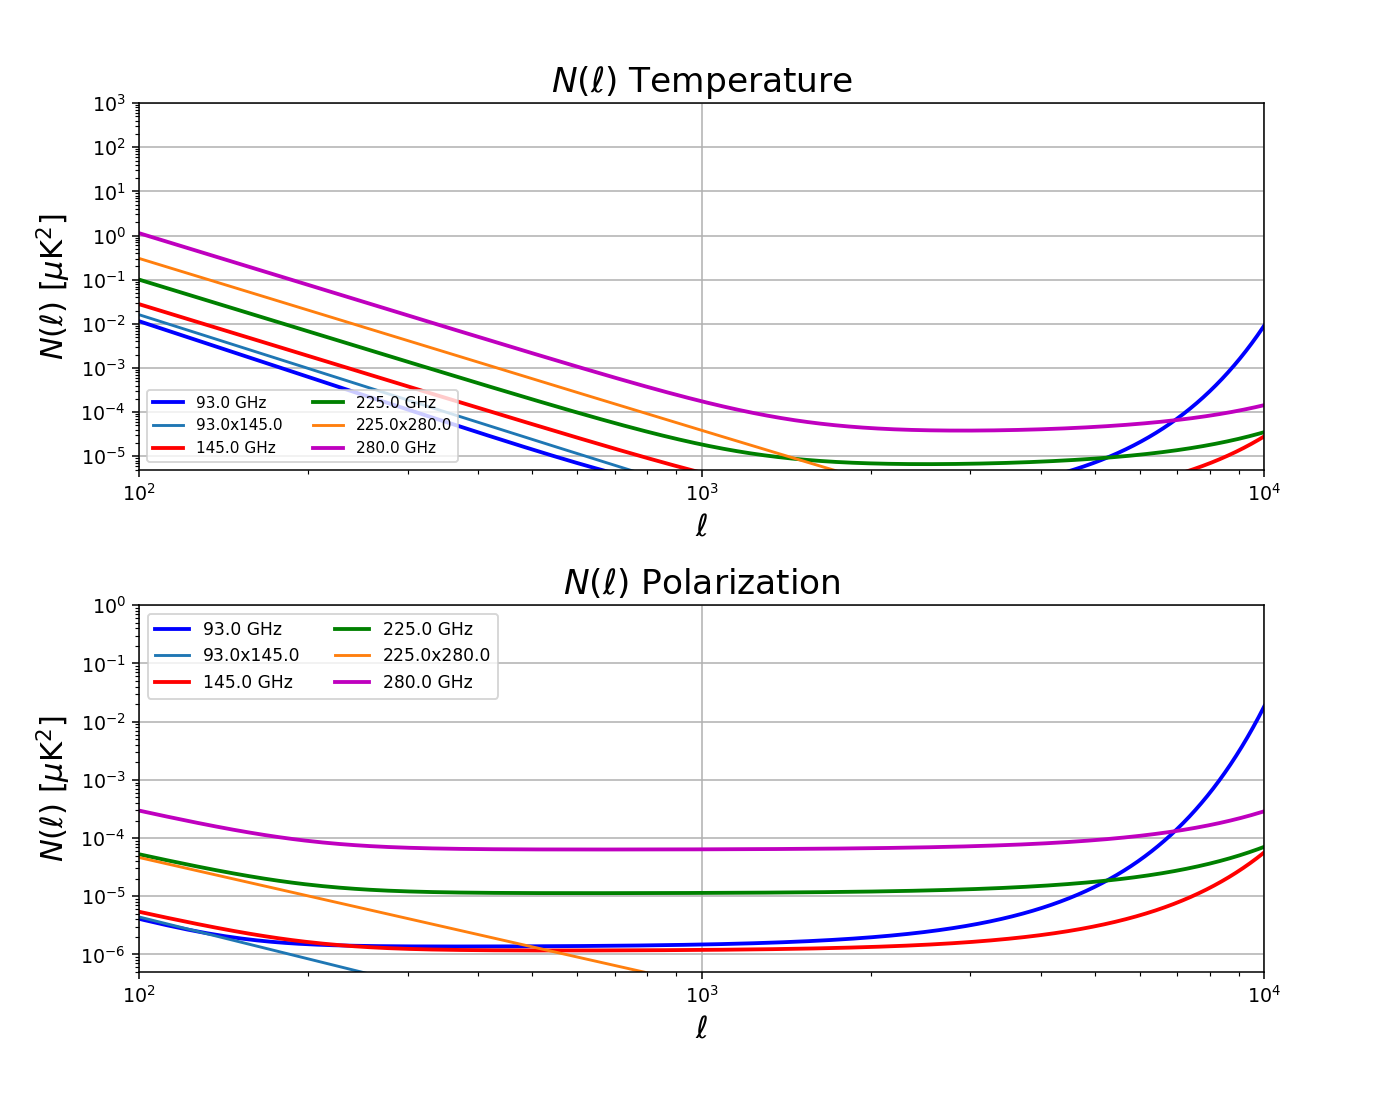

In [4]:
#Code for N(ell) interface

def N_ell_calculator(a):
    %matplotlib notebook
    import matplotlib.pyplot as plt
    import matplotlib as pltt
    import subprocess
    display.clear_output()
    
    global ell, N_ell_T_LA, N_ell_P_LA, Map_white_noise_levels
    ell, N_ell_T_LA, N_ell_P_LA, Map_white_noise_levels = S4_noise(band_centers=plot_params_values[0],
                                                              beam_sizes=plot_params_values[1],Sens=plot_params_values[17],
                                                              f_knees=plot_params_values[2],Cs=plot_params_values[3],
                                                              alpha_temp=plot_params_values[4],
                                                               survey_time=plot_params_values[5],f_sky=plot_params_values[6],
                                                               ret_after_obs_cuts=plot_params_values[7],
                                                               non_uniformity_param=plot_params_values[8],
                                                               ell_max=plot_params_values[9],ell_pivot=plot_params_values[10],
                                                               delta_ell=plot_params_values[11],
                                                               alpha_pol=plot_params_values[12],NTubes_LF=plot_params_values[13],
                                                               NTubes_MF=plot_params_values[14],NTubes_UHF=plot_params_values[15],
                                                                  model_num=plot_params_values[16])

    global band_centers
    band_centers = plot_params_values[0]

    colors = ['b','r','g','m','k','y']

    fig, (plt1,plt2) = plt.subplots(2,1,figsize=(10,8))
    fig.tight_layout(pad=5.0)
    corr_freq = [27.,93.,225.]
    for freq in band_centers:
        i = band_centers.index(freq)
        plt1.loglog(ell,N_ell_T_LA[(freq,freq)], label=str(freq) + ' GHz', color=colors[i], ls='-', lw=2.)
        #plt.loglog(ell,N_ell_V3_T_white[i], color=colors[i], ls='-', lw=0.5) #white noise
        for freq2 in band_centers:
            if freq in corr_freq and band_centers.index(freq2)==i+1:
                plt1.loglog(ell, N_ell_T_LA[(freq,freq2)], label=str(freq) + 'x' + str(freq2), lw=1.5)

    # include correlated atmospheric noise across frequencies
    #plt1.loglog(ell, N_ell_T_LA[1][0], label=r'$27 \times 39$ GHz atm.', color='orange', lw=1.5)
    #plt1.loglog(ell, N_ell_T_LA[1][1], label=r'$93 \times 145$ GHz atm.', color='fuchsia', lw=1.5)
    #plt1.loglog(ell, N_ell_T_LA[1][2], label=r'$225 \times 280$ GHz atm.', color='springgreen', lw=1.5)
    
    plt1.set_title('$N(\ell$) Temperature', fontsize=18)
    plt1.set_ylabel('$N(\ell$) [$\mu$K${}^2$]', fontsize=16)
    plt1.set_xlabel('$\ell$', fontsize=16)
    plt1.set_ylim(5e-6,1e3)
    plt1.set_xlim(100,max(ell))
    plt1.legend(loc='lower left', ncol=2, fontsize=8)
    plt1.grid()
    #plt.savefig('V3_calc_mode'+str(mode)+'_fsky'+str(fsky)+'_defaultdist_noise_LAT_T.pdf')
    #plt.close()

    ## plot the polarization noise curves
    for freq in band_centers:
        i = band_centers.index(freq)
        plt2.loglog(ell,N_ell_P_LA[(freq,freq)], label=str(freq) + ' GHz', color=colors[i], ls='-', lw=2.)
        #plt.loglog(ell,N_ell_V3_T_white[i], color=colors[i], ls='-', lw=0.5) #white noise
        for freq2 in band_centers:
            if freq in corr_freq and band_centers.index(freq2)==i+1:
                plt2.loglog(ell, N_ell_P_LA[(freq,freq2)], label=str(freq) + 'x' + str(freq2), lw=1.5)
                
    #for i in range(len(band_centers)):
    #    i = band_centers.index(freq)
    #    plt2.loglog(ell,N_ell_P_LA[0][i], label=str(band_centers[i])+' GHz (V3)', color=colors[i], ls='-', lw=2.)
    #    #plt.loglog(ell,N_ell_V3_T_white[i], color=colors[i], ls='-', lw=0.5) #white noise
    #    i+=1
    # include correlated atmospheric noise across frequencies
    #plt2.loglog(ell, N_ell_P_LA[1][0], label=r'$27 \times 39$ GHz atm.', color='orange', lw=1.5)
    #plt2.loglog(ell, N_ell_P_LA[1][1], label=r'$93 \times 145$ GHz atm.', color='fuchsia', lw=1.5)
    #plt2.loglog(ell, N_ell_P_LA[1][2], label=r'$225 \times 280$ GHz atm.', color='springgreen', lw=1.5)
    plt2.set_title(r"$N(\ell$) Polarization", fontsize=18)
    plt2.set_ylabel(r"$N(\ell$) [$\mu$K${}^2$]", fontsize=16)
    plt2.set_xlabel(r"$\ell$", fontsize=16)
    plt2.set_ylim(5e-7,1)
    plt2.set_xlim(100,max(ell))
    plt2.legend(loc='upper left', ncol=2, fontsize=9)
    plt2.grid()

    return

#############Text Box inputs to calculation################

try:
    params = [0 for i in range(len(plot_params_names))]
    for i in range(len(plot_params_names)):
        params[i] = ipw.Text(description=plot_params_names[i],value=str(plot_params_values[i]))
except NameError:
    params = [0 for i in range(18)]
    for i in range(len(params)):
        params[i] = ipw.Text(description='')
    print('Save your plot parameters with the red button in the previous section')
    print('Then try Shift-Enter on this cell again.')
    
####################Display###############################

params_box1=HBox(params[0:3])
params_box2=HBox(params[3:6])
params_box3=HBox(params[6:9])
params_box4=HBox(params[9:12])
params_box5=HBox(params[12:15])
params_box6=HBox(params[15:])
params_box = VBox([params_box1,params_box2,params_box3,params_box4,params_box5,params_box6])

plot_layout = Layout(width='600px',height='100px')
plot_button = ipw.Button(description = 'Plot N(ell)', layout=plot_layout, button_style='danger')
plot_button.layout.margin = '0px 0px 0px 175px'
plot_button.on_click(N_ell_calculator)

##################Run Interact button#####################
plots = VBox([params_box,plot_button])

plots


    


## <font color='green'>Generate</font> <font color='blue'>Cl spectra</font>:

---

Ignoring ['cmb']


/home/ahryciuk/CMBS4_Noise_Modeling/ilc_modules/foregrounds.py:182: RuntimeWarning: invalid value encountered in true_divide
  cl_dg_po = dl_dg_po / dl_fac
/home/ahryciuk/CMBS4_Noise_Modeling/ilc_modules/foregrounds.py:183: RuntimeWarning: invalid value encountered in true_divide
  cl_dg_clus = dl_dg_clus / dl_fac
/home/ahryciuk/CMBS4_Noise_Modeling/ilc_modules/foregrounds.py:224: RuntimeWarning: invalid value encountered in true_divide
  cl_rg = dl_rg / dl_fac


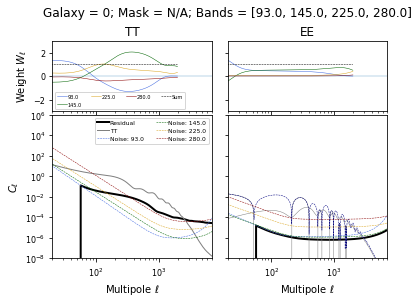

In [5]:
#Need to pass Nl's to make dictionary, make bl dictionary, ell array
from N_ell_calculator import package_beam_dic, package_nl_dic
os.chdir(cwd + '/ilc_modules')
import misc, ilc, flatsky, foregrounds as fg
os.chdir(cwd)
import matplotlib
%matplotlib inline



###############Interface###############################
#Interface
#params
paramfile = 'params.ini'
os.chdir(cwd + '/ilc_modules')
import plot_cls
from ConvertILC import convert_params_excel, append_params, calc_cls
param_dict = misc.fn_get_param_dict(paramfile)
os.chdir(cwd)

def convert_comp_sep(a):
    convert_params_excel(exp_dir,cwd)
    return
def app_comp_sep(a):
    append_params(exp_dir,cwd)
    return
def calc_cl_spec(a):
    
    #try:
    band_centers = plot_params_values[0]
    sensitivities = plot_params_values[17]
    beam_sizes = plot_params_values[1]
    ell_max = plot_params_values[9]
    nl_dic = {'T':N_ell_T_LA,'P':N_ell_P_LA}
    bl_dic = package_beam_dic(white_noise_levels_T=sensitivities,
                              white_noise_levels_P=sensitivities,
                              band_centers = band_centers,
                             beam_sizes=beam_sizes,ellmax=ell_max)
    
    cl_dic, weights_dic, cl_residual = calc_cls(nl_dic, bl_dic, ell, band_centers, cwd)
    
    
    
    plot_cls.plot_cls(param_dict,band_centers, ell, cwd,cl_residual,weights_dic,nl_dic)
    #except NameError:
    #    print('Did you calculate the N_ell?')
    
    
    return


#Layout of buttons
calc_cl_layout = Layout(display = 'flex',
                   flex_flow = 'column',
                    justify_content='space-between',
                    align_items = 'stretch',
                   border = 'solid',
                   width = '600px',
                    height = '100px')
add_box_layout = Layout(display = 'flex',
                   flex_flow = 'column',
                    justify_content='space-between',
                    align_items = 'stretch',
                   border = 'solid',
                   width = '300px',
                    height = '75px')
convert_parameters = ipw.Button(description='Convert Comp Sep Params to Excel',layout=add_box_layout)
append_parameters = ipw.Button(description='Overwrite Comp Sep Text File',layout=add_box_layout)
append_parameters.style.button_color='yellow'
convert_parameters.style.button_color='violet'

calc_cl = ipw.Button(description='Calculate Cl Component Spectra',layout=calc_cl_layout,button_style='primary')
calc_cl.style.button_color='green'

#Define clicking
convert_parameters.on_click(convert_comp_sep)
append_parameters.on_click(app_comp_sep)
calc_cl.on_click(calc_cl_spec)


param_buttons = HBox([convert_parameters,append_parameters])

total = VBox([param_buttons,calc_cl])
total.layout.margin = '0px 0px 0px 175px'
total
#######################################################


# Fisher Forecast:

In [18]:
sys.path.append('/home/ahryciuk/CMBS4_Noise_Modeling')
from ilc_modules import fisher

paramfile = '/home/ahryciuk/CMBS4_Noise_Modeling/ilc_modules/'
which_spectra = 'lensed_scalar'


os.system('python3 fisher.py -paramfile ' + paramfile + ' -which_spectra ' + which_spectra)

usage: ipykernel_launcher.py [-h] [-paramfile PARAMFILE]
                             [-which_spectra {lensed_scalar,unlensed_scalar}]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/ahryciuk/.local/share/jupyter/runtime/kernel-ea53ba7d-7aac-41cd-ad04-33bfa834339e.json


SystemExit: 2

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [14]:
os.system('pwd')

0

# Compare to Srini's Code

## Srini

In [8]:
%load_ext autoreload
%autoreload 2

#%pylab notebook
%matplotlib inline
from pylab import *
#from matplotlib import rc;rc('text', usetex=True);rc('font', weight='bold');matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
#rcParams['figure.dpi'] = 150
#rcParams["figure.facecolor"] = 'white'
import os
#rc('text.latex',preamble=r'\usepackage{/Users/ahryciuk/.configs/apjfonts}')

rcParams['figure.dpi'] = 150

import argparse, sys, numpy as np, scipy as sc, warnings, os
sys.path.append('/home/ahryciuk/DRAFT/modules/')
import flatsky, misc
import ilc, foregrounds as fg

#import matplotlib.cbook
warnings.filterwarnings('ignore',category=RuntimeWarning)
#warnings.filterwarnings('ignore', category=DeprecationWarning)
#warnings.filterwarnings('ignore', category=matplotlib.cbook.mplDeprecation)

#some constants
h=6.62607004e-34 #Planck constant in m2 kg / s
k_B=1.38064852e-23 #Boltzmann constant in m2 kg s-2 / K-1
Tcmb = 2.73 #Kelvin

#params
paramfile = 'params.ini'

os.chdir('/home/ahryciuk/DRAFT/modules/')
# read and store param dict
param_dict = misc.fn_get_param_dict(paramfile)
el = np.arange(param_dict['lmax'])
include_gal = param_dict['include_gal'] ##1
if not include_gal:
    param_dict['which_gal_mask'] = 3
which_gal_mask = param_dict['which_gal_mask']
s4like_mask = param_dict['s4like_mask']
try:
    remove_atm = param_dict['remove_atm']
except:
    remove_atm = 0    


OSError: params.ini not found.

In [189]:
print(1 / 5 * 1 / 2)

0.1


In [9]:
#S4 specs
remove_atm = param_dict['remove_atm']

specs_dic = {
#freq: [beam_arcmins, white_noise_T, elknee_T, alphaknee_T, whitenoise_P, elknee_P, alphaknee_P] 
#20: [10.0, None, None, None, None, None, None],
#27: [7.4, 21.8, 471., 3.5, 30.8, 700, 1.4],
#39: [5.1, 12.4, 428., 3.5, 17.6, 700, 1.4], 

93: [2.2, 2.0, 2154., 3.5, 2.9, 700, 1.4],
145: [1.4, 2.0, 4364., 3.5, 2.8, 700, 1.4],
225: [1.0, 6.9, 7334., 3.5, 9.8, 700, 1.4],
278: [0.9, 16.7, 7308., 3.5, 23.6, 700, 1.4],
#225: [1.0, 100., 7334., 3.5, 9.8, 700, 1.4],
#278: [0.9, 100., 7308., 3.5, 23.6, 700, 1.4],

}

if remove_atm:
    specs_dic = {
    #freq: [beam_arcmins, white_noise_T, elknee_T, alphaknee_T, whitenoise_P, elknee_P, alphaknee_P] 
    #20: [10.0, None, None, None, None, None, None],
    #27: [7.4, 21.8, 471., 0., 30.8, 700, 0.],
    #39: [5.1, 12.4, 428., 0., 17.6, 700, 0.], 

    93: [2.2, 2.0, 2154., 0., 2.9, 700, 0.],
    145: [1.4, 2.0, 4364., 0., 2.8, 700, 0.],
    225: [1.0, 6.9, 7334., 0., 9.8, 700, 0.],
    278: [0.9, 16.7, 7308., 0., 23.6, 700, 0.],
#    225: [1.0, 100., 7334., 0., 9.8, 700, 0.],
#    278: [0.9, 100., 7308., 0., 23.6, 700, 0.],        
    }


freqarr = sorted( specs_dic.keys() )

corr_noise = 1
if corr_noise:
    corr_noise_bands = {20: [20], 27:[39], 39:[27], 93:[145], 145:[93], 225: [278], 278: [225]}
else:
    corr_noise_bands = {20: [20], 27:[39], 39:[27], 93:[93], 145:[145], 225: [225], 278: [278]}
rho = 0.9

freqcalib_fac = None
final_comp = 'cmb'
TParr = ['T', 'P']
#which_spec_arr = ['TT', 'EE', 'TE']
which_spec_arr = ['TT', 'EE']
##include_gal = 1

#beam and noise arr
beamarr = []
noisearr_T, elkneearr_T, alphakneearr_T = [], [], []
noisearr_P, elkneearr_P, alphakneearr_P = [], [], []
for freq in freqarr:
    beam_arcmins, white_noise_T, elknee_T, alphaknee_T, whitenoise_P, elknee_P, alphaknee_P = specs_dic[freq]
    beamarr.append(beam_arcmins)
    noisearr_T.append(white_noise_T)
    noisearr_P.append(whitenoise_P)
    elkneearr_T.append(elknee_T)
    elkneearr_P.append(elknee_P)
    alphakneearr_T.append(alphaknee_T)
    alphakneearr_P.append(alphaknee_P)    

print(noisearr_T)

[2.0, 2.0, 6.9, 16.7]


In [10]:
#collect beam and noise into a dic; elknee and alpha into a dic
el = np.arange(param_dict['lmax'])

beam_noise_dic = {}
elknee_dic = {}
for TP in TParr:
    beam_noise_dic[TP] = {}
    elknee_dic[TP] = {} 
    if TP == 'T':
        freqarr, beamarr, noisearr, elkneearr, alphakneearr = freqarr, beamarr, noisearr_T, elkneearr_T, alphakneearr_T
    elif TP == 'P':
        freqarr, beamarr, noisearr, elkneearr, alphakneearr = freqarr, beamarr, noisearr_P, elkneearr_P, alphakneearr_P

    for (freq, beam, noise, elknee, alphaknee) in zip(freqarr, beamarr, noisearr, elkneearr, alphakneearr):
        beam_noise_dic[TP][freq] = [beam, noise]
        elknee_dic[TP][freq] = [elknee, alphaknee]
        
        #get beam deconvolved noise nls
nl_dic = {}
for TP in TParr:
    nl_dic[TP]={}
    for freq1 in freqarr:
        beamval1, noiseval1 = beam_noise_dic[TP][freq1]
        elknee1, alphaknee1 = elknee_dic[TP][freq1]
        for freq2 in freqarr:        
            beamval2, noiseval2 = beam_noise_dic[TP][freq2]
            elknee2, alphaknee2 = elknee_dic[TP][freq2]
            
            if freq1 == freq2:
                nl = misc.get_nl(noiseval1, el, beamval1, elknee = elknee1, alphaknee = alphaknee1)
            else:
                if freq2 in corr_noise_bands[freq1]:
                    nl = misc.get_nl(noiseval1, el, beamval1, elknee = elknee1, alphaknee = alphaknee1, \
                                     beamval2 = beamval2, noiseval2 = noiseval2, elknee2 = elknee2, alphaknee2 = alphaknee2, rho = rho)
                else:
                    nl = np.zeros( len(el) )
            nl[el<=param_dict['lmin']] = 0.
            ##nl[nl == 0.] = np.min(nl[nl!=0.])/1e3
            nl_dic[TP][(freq1, freq2)] = nl
print(nl_dic['T'].keys())

#get beams
bl_dic = misc.get_beam_dic(freqarr, beam_noise_dic['T'], param_dict['lmax'])
print(bl_dic.keys())
if (0):
    for freq in freqarr:
        plot(bl_dic[freq], label = freq)
    legend(loc = 1)

dict_keys([(93, 93), (93, 145), (93, 225), (93, 278), (145, 93), (145, 145), (145, 225), (145, 278), (225, 93), (225, 145), (225, 225), (225, 278), (278, 93), (278, 145), (278, 225), (278, 278)])
dict_keys([93, 145, 225, 278])


In [110]:
print(beam_noise_dic['T'][145])

[1.4, 2.0]


In [11]:
#get the CMB, noise, and foreground covriance
include_gal = param_dict['include_gal']

try:
    ignore_fg = param_dict['ignore_fg']
except:
    ignore_fg = []

ignore_fg.append(final_comp.lower()) #the required component need not go into the covariance matrix.
print(ignore_fg)

#freqarr = [145]
#param_dict['which_gal_mask'] = 0
cl_dic = {}
for which_spec in which_spec_arr:
    if which_spec == 'TT':
        el, cl_dic[which_spec] = ilc.get_analytic_covariance(param_dict, freqarr, \
                nl_dic = nl_dic['T'], ignore_fg = ignore_fg, include_gal = include_gal, bl_dic = bl_dic)
    else:
        el, cl_dic[which_spec] = ilc.get_analytic_covariance\
                    (param_dict, freqarr, nl_dic = nl_dic['P'], ignore_fg = ignore_fg, which_spec = which_spec, \
                    pol_frac_per_cent_dust = param_dict['pol_frac_per_cent_dust'], \
                    pol_frac_per_cent_radio = param_dict['pol_frac_per_cent_radio'], \
                    pol_frac_per_cent_tsz = param_dict['pol_frac_per_cent_tsz'], \
                    pol_frac_per_cent_ksz = param_dict['pol_frac_per_cent_ksz'], \
                    include_gal = include_gal, bl_dic = bl_dic)
print(cl_dic.keys(), cl_dic['TT'].keys())

#get weights
lmin = 0
weights_dic = {}
for which_spec in which_spec_arr:
    weights_dic[which_spec] = ilc.get_multipole_weightsarr(final_comp, freqarr, el, cl_dic[which_spec], lmin, freqcalib_fac)#, ignore_fg)
    
    

['cmb']
dict_keys(['TT', 'EE']) dict_keys([(93, 93), (93, 145), (93, 225), (93, 278), (145, 93), (145, 145), (145, 225), (145, 278), (225, 93), (225, 145), (225, 225), (225, 278), (278, 93), (278, 145), (278, 225), (278, 278)])


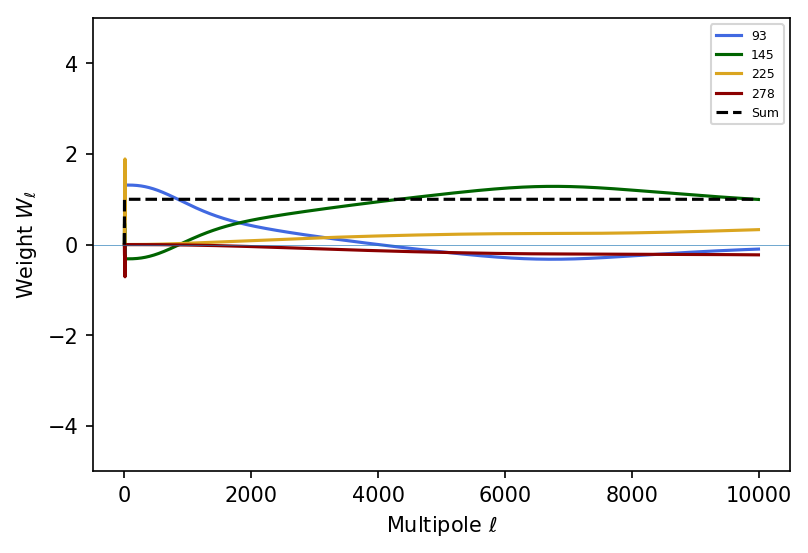

In [12]:
#plot weights now
colordic = {27:'indigo', 39:'blue', 93: 'royalblue', 145: 'darkgreen', 225: 'goldenrod', 278: 'darkred'}
for frqcntr, freq in enumerate( freqarr ):
    plot(weights_dic['TT'][frqcntr], color = colordic[freq], label = r'%s' %(freq))
plot(np.sum(weights_dic['TT'], axis = 0), 'k--', label = r'Sum')
axhline(lw=0.3);legend(loc = 1, fontsize = 6)
xlabel(r'Multipole $\ell$');ylabel(r'Weight $W_{\ell}$')
ylim(-5., 5.);show()#;sys.exit()

In [25]:
#get the residual power now
weights_dic, cl_residual = {}, {}
for which_spec in which_spec_arr:
    cl_residual[which_spec], weights_dic[which_spec] = ilc.residual_power(param_dict, freqarr, el, cl_dic[which_spec], final_comp = final_comp, freqcalib_fac = freqcalib_fac, return_weights = 1)

In [27]:
#plot and results file name
s4like_mask = param_dict['s4like_mask']

freqarr_str = '-'.join( np.asarray( freqarr ).astype(str) )
which_spec_arr_str = '-'.join( np.asarray( which_spec_arr ).astype(str) )
#opfname = 'results/galactic_sims/S4_ilc_20204020_galaxy%s_%s.npy' %(include_gal, freqarr_str)
opfname = 'results/galactic_sims/S4_ilc_zonca_sims_20204028_galaxy%s_%s_%s.npy' %(include_gal, freqarr_str, which_spec_arr_str)

if not corr_noise:
    opfname = opfname.replace('.npy', '_nocorrnoise.npy')
    
if s4like_mask:
    opfname = opfname.replace('galactic_sims/', 'galactic_sims/s4like_mask/')
    
if include_gal:
    opfname = opfname.replace('.npy', '_galmask%s.npy' %(which_gal_mask))

if remove_atm:
    opfname = opfname.replace('.npy', '_noatmnoise.npy')
    
cl_gal_folder = param_dict['cl_gal_folder']
if cl_gal_folder.find('CUmilta')>-1:
    opfname = opfname.replace('.npy', '_CU.npy')
else:
    opfname = opfname.replace('.npy', '_AZ.npy')

try:
    param_dict['cl_gal_dic_sync_fname_forced']
    opfname = opfname.replace('.npy', '_forcingsynctoCU.npy')
except:
    pass

#plname = opfname.replace('.npy', '.png').replace('S4_ilc', 'plot_S4_ilc')
if not s4like_mask:
    plname = opfname.replace('.npy', '.png').replace('results/galactic_sims/', 'results/galactic_sims/plots/')
else:
    plname = opfname.replace('.npy', '.png').replace('results/galactic_sims/s4like_mask/', 'results/galactic_sims/s4like_mask/plots/')
plfolder = '/'.join(plname.split('/')[:-1])
os.system('mkdir -p %s' %(plfolder))
print(opfname)
print(plname)

results/galactic_sims/s4like_mask/S4_ilc_zonca_sims_20204028_galaxy0_93-145-225-278_TT-EE_AZ.npy
results/galactic_sims/s4like_mask/plots/S4_ilc_zonca_sims_20204028_galaxy0_93-145-225-278_TT-EE_AZ.png


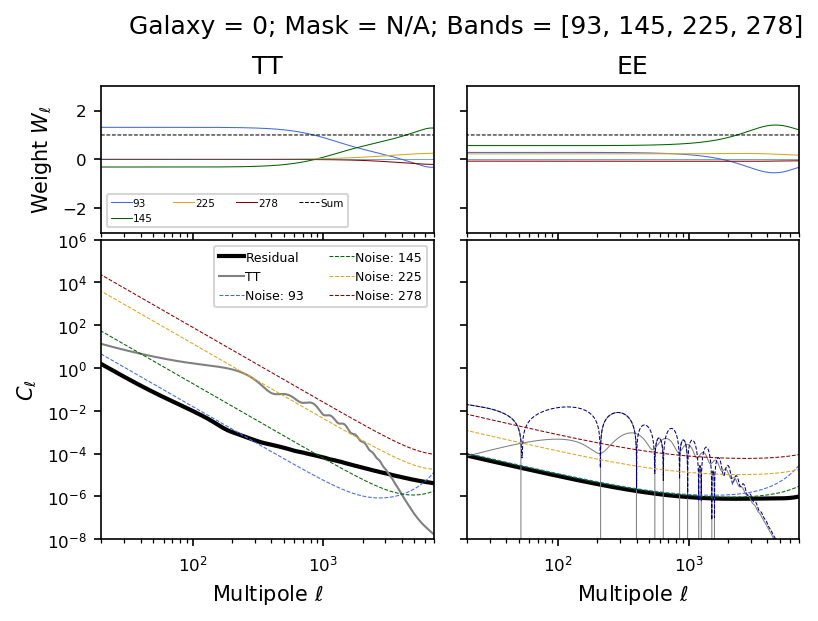

In [29]:
freq0, lmax = param_dict['freq0'], param_dict['lmax']
if include_gal:
    foregrounds_to_plot = ['kSZ', 'tSZ', 'DG-Po', 'DG-Cl', 'RG', 'dust', 'sync']
    pol_foregrounds_to_plot = ['dust', 'sync']
else:
    foregrounds_to_plot = ['kSZ', 'tSZ', 'DG-Po', 'DG-Cl', 'RG']
    pol_foregrounds_to_plot = []

#CAMB output for plotting
#camb_file = param_dict['Dlfile_len']
camb_file = '%s/%s' %(param_dict['data_folder']+'/ilc_modules', param_dict['Dlfile_len'])
el_camb = np.loadtxt(camb_file, usecols = [0])
dl_camb = np.loadtxt(camb_file, usecols = [1,2,3,4])

cl_camb = ( Tcmb**2. * dl_camb * 2 * np.pi ) / ( el_camb[:,None] * (el_camb[:,None] + 1) )
cl_camb *= 1e12
cl_TT, cl_EE, cl_BB, cl_TE = cl_camb.T


clf(); 
fsval = 8
tr, tc = 6, len(which_spec_arr)
subplots_adjust(wspace=0.1, hspace = 0.1)
xmin, xmax = 20, 7000
#first plot weights
colordic = {27:'indigo', 39:'blue', 93: 'royalblue', 145: 'darkgreen', 225: 'goldenrod', 278: 'darkred'}
rspan, cspan = 2, 1
curr_row = 0
for cntr, which_spec in enumerate( which_spec_arr ):
    ax = subplot2grid((tr,tc), (curr_row, cntr), rowspan = rspan, colspan = cspan, xscale = 'log')#, yscale = 'log')
    for frqcntr, freq in enumerate( freqarr ):
        plot(weights_dic[which_spec][frqcntr], color = colordic[freq], label = r'%s' %(freq), lw = 0.5)
    plot(np.sum(weights_dic[which_spec], axis = 0), 'k--', label = r'Sum', lw = 0.5)
    axhline(lw=0.3);
    #xlabel(r'Multipole $\ell$');
    setp(ax.get_xticklabels(which = 'both'), visible=False)
    if cntr == 0:
        ylabel(r'Weight $W_{\ell}$')
        legend(loc = 3, fontsize = 5, ncol = 4, handlelength = 2., handletextpad = 0.1)
    else:
        setp(ax.get_yticklabels(which = 'both'), visible=False)
    ylim(-3., 3.);
    xlim(xmin, xmax);
    for label in ax.get_xticklabels(): label.set_fontsize(fsval)
    for label in ax.get_yticklabels(): label.set_fontsize(fsval)        

    title(r'%s' %(which_spec))#, fontsize = 10)
        
curr_row = rspan
rspan = tr - rspan
for cntr, which_spec in enumerate( which_spec_arr ):
    #ax = subplot(1,2,cntr+1, xscale = 'log', yscale = 'log')
    ax = subplot2grid((tr,tc), (curr_row, cntr), rowspan = rspan, colspan = cspan, xscale = 'log', yscale = 'log')
    plot(el, cl_residual[which_spec], 'black', lw = 2., label = r'Residual')
    if which_spec == 'TT':
        plot(el_camb, cl_TT, 'gray', lw = 1., label = r'TT')
        '''
        cl_fg = np.zeros(len(el))
        for curr_fg in foregrounds_to_plot:
            if curr_fg == 'dust':
                el, cl_curr_fg = fg.get_cl_galactic(param_dict, 'dust', 145, 145, 'TT', bl_dic = bl_dic, el = el)
            elif curr_fg == 'sync':
                el, cl_curr_fg = fg.get_cl_galactic(param_dict, 'sync', 145, 145, 'TT', bl_dic = bl_dic, el = el)
            else:
                el_, cl_curr_fg = fg.get_foreground_power_spt(curr_fg, freq1 = freq0, lmax = lmax)
            #plot(el, cl_curr_fg, lw = 0.5, ls = '--', label = r'150: %s' %(curr_fg), alpha = 0.4)
            cl_fg += cl_curr_fg
        plot(el, cl_fg, lw = 5., ls = '--', label = r'150: All foregrounds', alpha = 1.)
        '''
    elif which_spec == 'EE':
        plot(el_camb, cl_EE, 'gray', lw = 0.5)#, label = r'EE')
        plot(el_camb, cl_TE, 'gray', ls = '-', lw = 0.5)#, label = r'TE')        
        plot(el_camb, abs( cl_TE ), 'navy', ls = '--', lw = 0.5) 
        '''
        for curr_fg in pol_foregrounds_to_plot:
            if curr_fg == 'dust':
                el, cl_curr_fg = fg.get_cl_galactic(param_dict, 'dust', 145, 145, 'EE', bl_dic = bl_dic, el = el)
            elif curr_fg == 'sync':
                el, cl_curr_fg = fg.get_cl_galactic(param_dict, 'sync', 145, 145, 'EE', bl_dic = bl_dic, el = el)
            plot(el, cl_curr_fg, lw = 0.5, ls = '--', label = r'150: %s' %(curr_fg), alpha = 0.4)
        '''
    #for freq in freqarr:
    #    plot(el, cl_dic[which_spec][(freq,freq)], color = colordic[freq], lw = 0.5, ls = '-', label = r'%s' %(freq), alpha = 1.)        
    for freq in freqarr:
        if which_spec == 'TT':
            nl = nl_dic['T'][(freq, freq)]
        elif which_spec == 'EE':
            nl = nl_dic['P'][(freq, freq)]
        elif which_spec == 'TE':
            nl = nl_dic['T'][(freq, freq)] * 0.
        plot(el, nl, color = colordic[freq], lw = 0.5, ls = '--', label = r'Noise: %s' %(freq))#, alpha = 0.5)
    #legend(loc=3, fancybox=1, ncol = 4, fontsize = 6);
    
    xlim(xmin, xmax);
    ylim(1e-8,1e6);
    xlabel(r'Multipole $\ell$')
    if cntr == 0: 
        ylabel(r'$C_{\ell}$')
        legend(loc = 1, fontsize = 6, ncol = 2, handlelength = 2., handletextpad = 0.1)
    else:
        setp(ax.get_yticklabels(which = 'both'), visible=False)
    for label in ax.get_xticklabels(): label.set_fontsize(fsval)
    for label in ax.get_yticklabels(): label.set_fontsize(fsval)
        
#tit = 'Galaxy = %s; Mask = %s; Bands = %s' %(include_gal, param_dict['which_gal_mask'], str(freqarr))
if remove_atm:
    tit = 'Galaxy = %s; Mask = %s; Bands = %s; no 1/f' %(include_gal, param_dict['which_gal_mask'], str(freqarr))
else:
    if include_gal:
        tit = 'Galaxy = %s; Mask = %s; Bands = %s' %(include_gal, param_dict['which_gal_mask'], str(freqarr))    
    else:
        tit = 'Galaxy = %s; Mask = N/A; Bands = %s' %(include_gal, str(freqarr))    
if not corr_noise:
    tit = '%s; No corr. noise' %(tit)
suptitle(r'%s' %tit, x = 0.53, y = 1.)
#savefig(plname)
show()


## Me

In [7]:
#Need to pass Nl's to make dictionary, make bl dictionary, ell array
from N_ell_calculator import package_beam_dic, package_nl_dic
os.chdir(cwd + '/ilc_modules')
import misc, ilc, flatsky, foregrounds as fg
os.chdir(cwd)

TParr = ['T','P']

#Interface
#params
paramfile = 'params.ini'
os.chdir(cwd + '/ilc_modules')
import plot_cls
from ConvertILC import convert_params_excel, append_params, calc_cls
param_dict = misc.fn_get_param_dict(paramfile)
os.chdir(cwd)

#try:
band_centers_me = plot_params_values[0]
sensitivities_me = plot_params_values[17]
beam_sizes_me = plot_params_values[1]
ell_max = plot_params_values[9]
nl_dic_me = {'T':N_ell_T_LA,'P':N_ell_P_LA}
bl_dic_me = package_beam_dic(white_noise_levels_T=sensitivities_me,
                          white_noise_levels_P=sensitivities_me,
                          band_centers = band_centers_me,
                         beam_sizes=beam_sizes_me,ellmax=ell_max)

cl_dic_me, weights_dic_me, cl_residual_me = calc_cls(nl_dic_me, bl_dic_me, ell, band_centers_me, cwd)

Ignoring ['cmb']


/home/ahryciuk/CMBS4_Noise_Modeling/ilc_modules/foregrounds.py:182: RuntimeWarning: invalid value encountered in true_divide
  cl_dg_po = dl_dg_po / dl_fac
/home/ahryciuk/CMBS4_Noise_Modeling/ilc_modules/foregrounds.py:183: RuntimeWarning: invalid value encountered in true_divide
  cl_dg_clus = dl_dg_clus / dl_fac
/home/ahryciuk/CMBS4_Noise_Modeling/ilc_modules/foregrounds.py:224: RuntimeWarning: invalid value encountered in true_divide
  cl_rg = dl_rg / dl_fac


In [12]:
TParr = ['T','P']
nl_dic = {'T':N_ell_T_LA,'P':N_ell_P_LA}
for TP in TParr:
    for freq1 in band_centers:
        for freq2 in band_centers:
            nl_dic[TP][(freq1,freq2)][ell<=param_dict['lmin']]=0.

In [15]:
band_centers = plot_params_values[0]
sensitivities = plot_params_values[17]
beam_sizes = plot_params_values[1]
ell_max = plot_params_values[9]
bl_dic = package_beam_dic(white_noise_levels_T=sensitivities,
                          white_noise_levels_P=sensitivities,
                          band_centers = band_centers,
                         beam_sizes=beam_sizes,ellmax=ell_max)

In [244]:
#Reduce Srini's dimensions by two
freqarr = [93,145,225,280]
nl_dic_crop = {}
nl_dic_me_atten = {}
for TP in TParr:
    nl_dic_crop[TP] = {}
    nl_dic_me_atten[TP] = {}
    for freq1 in freqarr:
        for freq2 in freqarr:
            #nl_dic_crop[TP][(freq1,freq2)][:] = nl_dic[TP][(freq1,freq2)][2:]
            if TP == 'T':
                nl_dic_me_atten[TP][(freq1,freq2)] = 0.02*nl_dic_me[TP][(freq1,freq2)]
            else:
                if freq1 == freq2:
                    nl_dic_me_atten[TP][(freq1,freq2)] = nl_dic_me[TP][(freq1,freq2)]
                else:
                    nl_dic_me_atten[TP][(freq1,freq2)] = np.zeros(len(ell))
            


Ignoring ['cmb']


/home/ahryciuk/CMBS4_Noise_Modeling/ilc_modules/foregrounds.py:182: RuntimeWarning: invalid value encountered in true_divide
  cl_dg_po = dl_dg_po / dl_fac
/home/ahryciuk/CMBS4_Noise_Modeling/ilc_modules/foregrounds.py:183: RuntimeWarning: invalid value encountered in true_divide
  cl_dg_clus = dl_dg_clus / dl_fac
/home/ahryciuk/CMBS4_Noise_Modeling/ilc_modules/foregrounds.py:224: RuntimeWarning: invalid value encountered in true_divide
  cl_rg = dl_rg / dl_fac


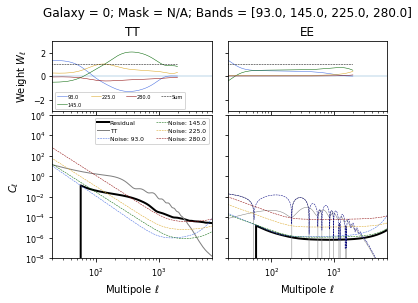

In [16]:

cl_dic, weights_dic, cl_residual = calc_cls(nl_dic, bl_dic, ell, band_centers, cwd)
%matplotlib inline    
    
    
plot_cls.plot_cls(param_dict,band_centers, ell, cwd,cl_residual,weights_dic,nl_dic)

# Compare the two

## Compare nl_dic

2000


(1e-07, 10000.0)

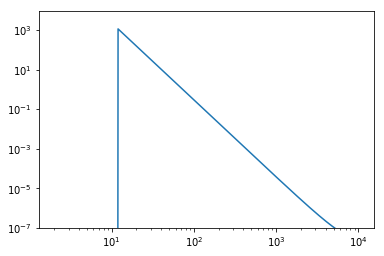

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
#print(len(nl_dic['T'][(93,93)]))
#print(len(nl_dic_me['T'][(93,93)]))

plt.loglog(ell,nl_dic['T'][(225,280)])
plt.ylim(1e-7,1e4)

## Compare bl_dic

(1e-08, 1.0)

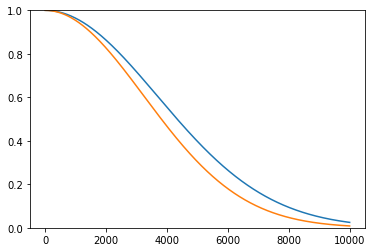

In [132]:
plt.plot(el,bl_dic[93],bl_dic_me[93])
plt.ylim(1e-8,1e0)

## Compare cl_dic

(1e-08, 0.001)

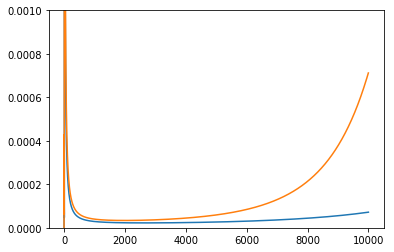

In [243]:
plt.plot(el,cl_dic['EE'][(225,278)],cl_dic_me_atten['EE'][(225,280)])
plt.ylim(1e-8,1e-3)

In [27]:
#plot and results file name
freqarr_str = '-'.join( np.asarray( freqarr ).astype(str) )
which_spec_arr_str = '-'.join( np.asarray( which_spec_arr ).astype(str) )
#opfname = 'results/galactic_sims/S4_ilc_20204020_galaxy%s_%s.npy' %(include_gal, freqarr_str)
opfname = 'results/galactic_sims/S4_ilc_zonca_sims_20204028_galaxy%s_%s_%s.npy' %(include_gal, freqarr_str, which_spec_arr_str)

if not corr_noise:
    opfname = opfname.replace('.npy', '_nocorrnoise.npy')
    
if s4like_mask:
    opfname = opfname.replace('galactic_sims/', 'galactic_sims/s4like_mask/')
    
if include_gal:
    opfname = opfname.replace('.npy', '_galmask%s.npy' %(which_gal_mask))

if remove_atm:
    opfname = opfname.replace('.npy', '_noatmnoise.npy')
    
cl_gal_folder = param_dict['cl_gal_folder']
if cl_gal_folder.find('CUmilta')>-1:
    opfname = opfname.replace('.npy', '_CU.npy')
else:
    opfname = opfname.replace('.npy', '_AZ.npy')

try:
    param_dict['cl_gal_dic_sync_fname_forced']
    opfname = opfname.replace('.npy', '_forcingsynctoCU.npy')
except:
    pass

#plname = opfname.replace('.npy', '.png').replace('S4_ilc', 'plot_S4_ilc')
if not s4like_mask:
    plname = opfname.replace('.npy', '.png').replace('results/galactic_sims/', 'results/galactic_sims/plots/')
else:
    plname = opfname.replace('.npy', '.png').replace('results/galactic_sims/s4like_mask/', 'results/galactic_sims/s4like_mask/plots/')
plfolder = '/'.join(plname.split('/')[:-1])
os.system('mkdir -p %s' %(plfolder))
print(opfname)
print(plname)

results/galactic_sims/S4_ilc_zonca_sims_20204028_galaxyFalse_93.0-145.0-225.0-280.0_TT-EE_AZ.npy
results/galactic_sims/plots/S4_ilc_zonca_sims_20204028_galaxyFalse_93.0-145.0-225.0-280.0_TT-EE_AZ.png


In [8]:
#params
paramfile = 'params.ini'
# read and store param dict
os.chdir(cwd + '/ilc_modules')
param_dict = misc.fn_get_param_dict(paramfile)

##Constants##
include_gal = param_dict['include_gal']
Tcmb = param_dict['T_cmb']
which_spec_arr = ['TT','EE']
remove_atm = param_dict['remove_atm']
corr_noise = 1
#############

freq0, lmax = param_dict['freq0'], param_dict['lmax']
if include_gal:
    foregrounds_to_plot = ['kSZ', 'tSZ', 'DG-Po', 'DG-Cl', 'RG', 'dust', 'sync']
    pol_foregrounds_to_plot = ['dust', 'sync']
else:
    foregrounds_to_plot = ['kSZ', 'tSZ', 'DG-Po', 'DG-Cl', 'RG']
    pol_foregrounds_to_plot = []

#CAMB output for plotting
#camb_file = param_dict['Dlfile_len']
#camb_file = '%s/%s' %(param_dict['data_folder'], param_dict['Dlfile_len'])
camb_file = '/home/ahryciuk/CMBS4_Noise_Modeling/ilc_modules/output_planck_r_0.0_2015_cosmo_lensedCls.dat'
el_camb = np.loadtxt(camb_file, usecols = [0])
dl_camb = np.loadtxt(camb_file, usecols = [1,2,3,4])

cl_camb = ( Tcmb**2. * dl_camb * 2 * np.pi ) / ( el_camb[:,None] * (el_camb[:,None] + 1) )
cl_camb *= 1e12
cl_TT, cl_EE, cl_BB, cl_TE = cl_camb.T


clf(); 
fsval = 8
tr, tc = 6, len(which_spec_arr)
subplots_adjust(wspace=0.1, hspace = 0.1)
xmin, xmax = 20, 7000
#first plot weights
colordic = {27:'indigo', 39:'blue', 93: 'royalblue', 145: 'darkgreen', 225: 'goldenrod', 280: 'darkred'}
rspan, cspan = 2, 1
curr_row = 0
for cntr, which_spec in enumerate( which_spec_arr ):
    ax = subplot2grid((tr,tc), (curr_row, cntr), rowspan = rspan, colspan = cspan, xscale = 'log')#, yscale = 'log')
    for frqcntr, freq in enumerate( freqarr ):
        plot(weights_dic[which_spec][frqcntr], color = colordic[freq], label = r'%s' %(freq), lw = 0.5)
    plot(np.sum(weights_dic[which_spec], axis = 0), 'k--', label = r'Sum', lw = 0.5)
    axhline(lw=0.3);
    #xlabel(r'Multipole $\ell$');
    setp(ax.get_xticklabels(which = 'both'), visible=False)
    if cntr == 0:
        ylabel(r'Weight $W_{\ell}$')
        legend(loc = 3, fontsize = 5, ncol = 4, handlelength = 2., handletextpad = 0.1)
    else:
        setp(ax.get_yticklabels(which = 'both'), visible=False)
    ylim(-3., 3.);
    xlim(xmin, xmax);
    for label in ax.get_xticklabels(): label.set_fontsize(fsval)
    for label in ax.get_yticklabels(): label.set_fontsize(fsval)        

    title(r'%s' %(which_spec))#, fontsize = 10)
        
curr_row = rspan
rspan = tr - rspan
for cntr, which_spec in enumerate( which_spec_arr ):
    #ax = subplot(1,2,cntr+1, xscale = 'log', yscale = 'log')
    ax = subplot2grid((tr,tc), (curr_row, cntr), rowspan = rspan, colspan = cspan, xscale = 'log', yscale = 'log')
    plot(el, cl_residual[which_spec], 'black', lw = 2., label = r'Residual')
    if which_spec == 'TT':
        plot(el_camb, cl_TT, 'gray', lw = 1., label = r'TT')
        '''
        cl_fg = np.zeros(len(el))
        for curr_fg in foregrounds_to_plot:
            if curr_fg == 'dust':
                el, cl_curr_fg = fg.get_cl_galactic(param_dict, 'dust', 145, 145, 'TT', bl_dic = bl_dic, el = el)
            elif curr_fg == 'sync':
                el, cl_curr_fg = fg.get_cl_galactic(param_dict, 'sync', 145, 145, 'TT', bl_dic = bl_dic, el = el)
            else:
                el_, cl_curr_fg = fg.get_foreground_power_spt(curr_fg, freq1 = freq0, lmax = lmax)
            #plot(el, cl_curr_fg, lw = 0.5, ls = '--', label = r'150: %s' %(curr_fg), alpha = 0.4)
            cl_fg += cl_curr_fg
        plot(el, cl_fg, lw = 5., ls = '--', label = r'150: All foregrounds', alpha = 1.)
        '''
    elif which_spec == 'EE':
        plot(el_camb, cl_EE, 'gray', lw = 0.5)#, label = r'EE')
        plot(el_camb, cl_TE, 'gray', ls = '-', lw = 0.5)#, label = r'TE')        
        plot(el_camb, abs( cl_TE ), 'navy', ls = '--', lw = 0.5) 
        '''
        for curr_fg in pol_foregrounds_to_plot:
            if curr_fg == 'dust':
                el, cl_curr_fg = fg.get_cl_galactic(param_dict, 'dust', 145, 145, 'EE', bl_dic = bl_dic, el = el)
            elif curr_fg == 'sync':
                el, cl_curr_fg = fg.get_cl_galactic(param_dict, 'sync', 145, 145, 'EE', bl_dic = bl_dic, el = el)
            plot(el, cl_curr_fg, lw = 0.5, ls = '--', label = r'150: %s' %(curr_fg), alpha = 0.4)
        '''
    #for freq in freqarr:
    #    plot(el, cl_dic[which_spec][(freq,freq)], color = colordic[freq], lw = 0.5, ls = '-', label = r'%s' %(freq), alpha = 1.)        
    for freq in freqarr:
        if which_spec == 'TT':
            nl = nl_dic['T'][(freq, freq)]
        elif which_spec == 'EE':
            nl = nl_dic['P'][(freq, freq)]
        elif which_spec == 'TE':
            nl = nl_dic['T'][(freq, freq)] * 0.
        plot(el, nl, color = colordic[freq], lw = 0.5, ls = '--', label = r'Noise: %s' %(freq))#, alpha = 0.5)
    #legend(loc=3, fancybox=1, ncol = 4, fontsize = 6);
    
    xlim(xmin, xmax);
    ylim(1e-8,1e6);
    xlabel(r'Multipole $\ell$')
    if cntr == 0: 
        ylabel(r'$C_{\ell}$')
        legend(loc = 1, fontsize = 6, ncol = 2, handlelength = 2., handletextpad = 0.1)
    else:
        setp(ax.get_yticklabels(which = 'both'), visible=False)
    for label in ax.get_xticklabels(): label.set_fontsize(fsval)
    for label in ax.get_yticklabels(): label.set_fontsize(fsval)
        
#tit = 'Galaxy = %s; Mask = %s; Bands = %s' %(include_gal, param_dict['which_gal_mask'], str(freqarr))
if remove_atm:
    tit = 'Galaxy = %s; Mask = %s; Bands = %s; no 1/f' %(include_gal, param_dict['which_gal_mask'], str(freqarr))
else:
    if include_gal:
        tit = 'Galaxy = %s; Mask = %s; Bands = %s' %(include_gal, param_dict['which_gal_mask'], str(freqarr))    
    else:
        tit = 'Galaxy = %s; Mask = N/A; Bands = %s' %(include_gal, str(freqarr))    
if not corr_noise:
    tit = '%s; No corr. noise' %(tit)
suptitle(r'%s' %tit, x = 0.53, y = 1.)
#savefig(plname)
#show()

Text(0.53,1,'Galaxy = False; Mask = N/A; Bands = [93.0, 145.0, 225.0, 280.0]')

<IPython.core.display.Javascript object>


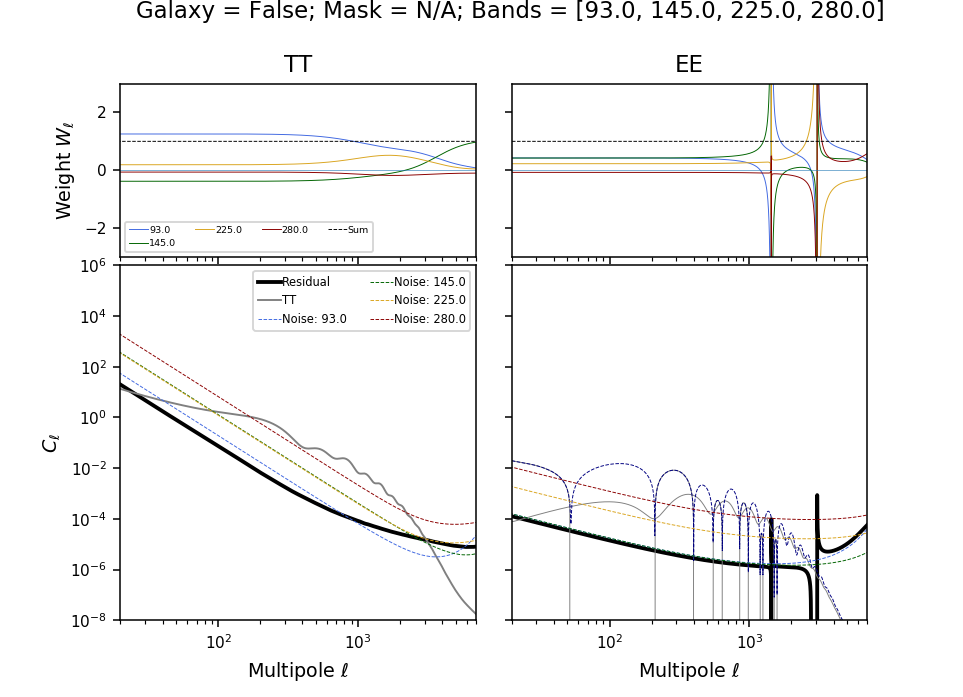

In [11]:
from plot_cls import plot_cls
import matplotlib
%matplotlib notebook
#params
paramfile = 'params.ini'
# read and store param dict
os.chdir(cwd + '/ilc_modules')
#import misc, flatsky, ilc, foregrounds as fg
param_dict = misc.fn_get_param_dict(paramfile)

plot_cls(param_dict,band_centers, ell, cwd,cl_residual,weights_dic,nl_dic)

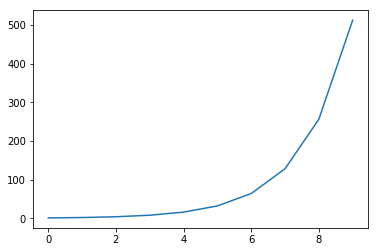

In [1]:
import os
import matplotlib
%matplotlib inline
cwd = os.getcwd()
os.chdir(cwd + '/ilc_modules')
from plot import plot_try

plot_try()